In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data =  pd.read_csv("/content/digital_literacy_dataset.csv")
data.head()

,User_ID,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
0,U0001,43,Male,Primary,Student,Medium,Semi-Rural,25,1,33,...,7,15.85,92,12,Low,77,4,51,Yes,58.2
1,U0002,60,Female,High School,Farmer,Low,Rural,22,14,35,...,9,22.24,88,24,Low,76,4,98,Yes,55.3
2,U0003,47,Female,Primary,Farmer,Low,Semi-Rural,14,31,14,...,13,12.15,67,17,Low,67,5,75,Yes,52.3
3,U0004,34,Female,Secondary,Farmer,Low,Rural,6,32,17,...,8,25.59,69,28,Medium,59,1,61,Yes,55.5
4,U0005,50,Male,High School,Other,Medium,Rural,14,41,19,...,8,16.65,76,10,Medium,90,4,82,No,59.3


This code identifies all columns with categorical data types (typically labeled as object in pandas) and prints the frequency of each unique value, including missing values

In [11]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Display value counts for each categorical column
for col in categorical_columns:
    print(f"\\nColumn: {col}\\n{'-'*40}")
    print(data[col].value_counts(dropna=False))


\nColumn: User_ID\n----------------------------------------
User_ID
U1000    1
U0001    1
U0002    1
U0003    1
U0004    1
        ..
U0013    1
U0012    1
U0011    1
U0010    1
U0009    1
Name: count, Length: 1000, dtype: int64
\nColumn: Gender\n----------------------------------------
Gender
Female    465
Male      446
Other      89
Name: count, dtype: int64
\nColumn: Education_Level\n----------------------------------------
Education_Level
Primary        274
Secondary      270
High School    244
NaN            212
Name: count, dtype: int64
\nColumn: Employment_Status\n----------------------------------------
Employment_Status
Unemployed       245
Self-Employed    199
Farmer           194
Other            186
Student          176
Name: count, dtype: int64
\nColumn: Household_Income\n----------------------------------------
Household_Income
Low       595
Medium    283
High      122
Name: count, dtype: int64
\nColumn: Location_Type\n----------------------------------------
Location_Typ

# Insights from Categorical Variables


User_ID

Each user has a unique identifier, confirming that the dataset contains individual-level records. There are 1,000 unique IDs, so this column is not useful for modeling but is important for tracking.


Gender

Female: 465
Male: 446
Other: 89
This distribution is fairly balanced, with a small proportion identifying as "Other."
This variable can be used to explore gender-based differences in digital literacy.



Education_Level

Primary: 274
Secondary: 270
High School: 244
Missing (NaN): 212
About 21% of entries are missing, which is significant. We’ll need to decide whether to impute these values or treat them as a separate category.



Employment_Status

Unemployed: 245
Self-Employed: 199
Farmer: 194
Other: 186
Student: 176
This variable is well-distributed across different employment types, which could be useful for modeling digital literacy in relation to economic activity.



Household_Income

Low: 595
Medium: 283
High: 122
The majority of respondents fall into the low-income bracket, which may correlate with access to technology and training outcomes.



Location_Type

Rural: 702
Semi-Rural: 298
This shows a strong rural representation, which is important context for understanding digital access and infrastructure challenges.



Engagement_Level

Medium: 474
Low: 327
High: 199
Engagement levels vary, with most users falling into the medium category. This could be a key predictor of post-training literacy scores.



Employment_Impact

No: 705
Yes: 295
This binary variable indicates whether the training had an impact on employment. It could serve as a target variable for classification modeling.

**Data Preparation**

This code first checks how many values are missing in the Education_Level column. It then calculates the mode, the most frequently occurring value, which in this dataset is 'Primary'. All missing entries are replaced with this value using fillna(). Finally, it confirms that there are no remaining missing values.

In [13]:
# Count missing values before imputation
missing_count = data['Education_Level'].isna().sum()

# Find the mode (most frequent value)
mode_value = data['Education_Level'].mode()[0]

# Replace missing values with the mode
data['Education_Level'] = data['Education_Level'].fillna(mode_value)

# Confirm missing values are handled
post_missing_count = data['Education_Level'].isna().sum()


In [14]:
# Print summary
print(f"Before imputation: {missing_count} missing values")
print(f"Mode used for imputation: {mode_value}")
print(f"After imputation: {post_missing_count} missing values")


Before imputation: 212 missing values
Mode used for imputation: Primary
After imputation: 0 missing values


Exploring the numerical variables in the digital literacy dataset using descriptive statistics. This step helps us understand the central tendencies, variability, and range of each numeric feature, which is crucial for both data cleaning and modeling

In [16]:
# Select numerical columns
numerical_df = data.select_dtypes(include=['int64', 'float64'])

# Generate descriptive statistics
descriptive_stats = numerical_df.describe().transpose()
print(descriptive_stats)

                                               count      mean        std  \
Age                                           1000.0  40.86400  13.573568   
Basic_Computer_Knowledge_Score                1000.0  24.97000  14.838439   
Internet_Usage_Score                          1000.0  24.82200  15.045088   
Mobile_Literacy_Score                         1000.0  25.72800  15.002036   
Post_Training_Basic_Computer_Knowledge_Score  1000.0  60.14100  17.238628   
Post_Training_Internet_Usage_Score            1000.0  60.00800  17.646737   
Post_Training_Mobile_Literacy_Score           1000.0  60.57200  17.619059   
Modules_Completed                             1000.0  10.02200   3.188367   
Average_Time_Per_Module                       1000.0  20.01016   5.812247   
Quiz_Performance                              1000.0  80.32200  11.967436   
Session_Count                                 1000.0  19.99400   6.033603   
Adaptability_Score                            1000.0  74.84000  14.446907   

**Key Insights from the Output**


Age ranges from 18 to 64, with a mean of ~41 years. This suggests a mature participant base, likely adults in various employment categories.


Pre-training scores (Basic_Computer_Knowledge_Score, Internet_Usage_Score, Mobile_Literacy_Score) average around 25 out of 50, indicating low baseline digital literacy.


Post-training scores jump to an average of ~60 out of 100, showing significant improvement after the intervention.


Modules_Completed averages around 10, with a range from 5 to 15, suggesting moderate engagement with the training content.


Average_Time_Per_Module is about 20 minutes, with a spread from 10 to 30 minutes, indicating variability in how long users spend learning.


Quiz_Performance is relatively high (mean ~80%), which may reflect effective learning or well-designed assessments.


Session_Count averages 20, showing consistent interaction with the platform.


Adaptability_Score and Skill_Application both average around 75, suggesting users are applying what they learn and adapting well.


Feedback_Rating ranges from 1 to 5, with a mean of ~3, indicating moderate satisfaction.


Overall_Literacy_Score has a mean of ~60, with a range from 32.4 to 89.9, which will likely be a key target variable for modeling.

This statistical overview gives us a solid foundation for identifying outliers, normalizing data, and selecting features for predictive modeling

**Visualization of the numeric distribution**

Here are the visualizations of the numerical variables in the digital literacy dataset. Each histogram reveals how values are distributed across participants, helping us identify patterns, skewness, and potential outliers.

In [18]:
import plotly.express as px

# Create histograms for each numerical column
for column in numerical_df.columns:
    fig = px.histogram(data, x=column, nbins=30, title=f"Distribution of {column}")
    fig.show()


Since the goal is to predict literacy decline among Gen Alpha, I've filtered the dataset to include only participants aged 18 to 24, which fits the Gen Alpha cohort as of 2025.
Selects variables that are most likely to influence or reflect literacy outcomes.
Prints a summary including the number of Gen Alpha records, age range, and missing values.

In [21]:
# Filter for Gen Alpha participants (typically aged 5–24 as of 2025)
gen_alpha_df = data[data['Age'] <= 24]

# Select relevant columns for literacy modeling
relevant_columns = [
    'User_ID', 'Age', 'Gender', 'Education_Level', 'Employment_Status', 'Household_Income', 'Location_Type',
    'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score',
    'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score',
    'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
    'Engagement_Level', 'Adaptability_Score', 'Feedback_Rating', 'Skill_Application', 'Overall_Literacy_Score'
]

# Create the filtered dataset
filtered_df = gen_alpha_df[relevant_columns]

# Display summary
print("Total Gen Alpha Records:", len(filtered_df))
print("Age Range:", filtered_df['Age'].min(), "to", filtered_df['Age'].max())
print("Missing Values:\n", filtered_df.isnull().sum())


Total Gen Alpha Records: 146
Age Range: 18 to 24
Missing Values:
 User_ID                                         0
Age                                             0
Gender                                          0
Education_Level                                 0
Employment_Status                               0
Household_Income                                0
Location_Type                                   0
Basic_Computer_Knowledge_Score                  0
Internet_Usage_Score                            0
Mobile_Literacy_Score                           0
Post_Training_Basic_Computer_Knowledge_Score    0
Post_Training_Internet_Usage_Score              0
Post_Training_Mobile_Literacy_Score             0
Modules_Completed                               0
Average_Time_Per_Module                         0
Quiz_Performance                                0
Session_Count                                   0
Engagement_Level                                0
Adaptability_Score                

**Preparing variables for modelling**

In [26]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [29]:
# Encode categorical variables
categorical_cols = ['Gender', 'Education_Level', 'Employment_Status', 'Household_Income', 'Location_Type', 'Engagement_Level']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    filtered_df[col] = le.fit_transform(filtered_df[col])
    label_encoders[col] = le

# Scale numerical features
numerical_cols = [
    'Age', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score',
    'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score', 'Post_Training_Mobile_Literacy_Score',
    'Modules_Completed', 'Average_Time_Per_Module', 'Quiz_Performance', 'Session_Count',
    'Adaptability_Score', 'Feedback_Rating', 'Skill_Application'
]
scaler = StandardScaler()
filtered_df[numerical_cols] = scaler.fit_transform(filtered_df[numerical_cols])


# Display summary
print("Feature engineering completed. Transformed dataset summary:")
print(filtered_df.describe(include='all'))


Feature engineering completed. Transformed dataset summary:
       User_ID           Age      Gender  Education_Level  Employment_Status  \
count      146  1.460000e+02  146.000000       146.000000         146.000000   
unique     146           NaN         NaN              NaN                NaN   
top      U0013           NaN         NaN              NaN                NaN   
freq         1           NaN         NaN              NaN                NaN   
mean       NaN -1.368768e-17    0.630137         1.006849           2.054795   
std        NaN  1.003442e+00    0.643414         0.679722           1.418016   
min        NaN -1.377470e+00    0.000000         0.000000           0.000000   
25%        NaN -9.064846e-01    0.000000         1.000000           1.000000   
50%        NaN  3.548516e-02    1.000000         1.000000           2.000000   
75%        NaN  9.774550e-01    1.000000         1.000000           3.000000   
max        NaN  1.448440e+00    2.000000         2.000000   

/tmp/ipython-input-85102567.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-85102567.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-85102567.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-85102567.

**Modelling**

**Logistic Regression Model**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [34]:
# Binarize the target variable: Overall_Literacy_Score
# Below 55 = at risk (1), 55 and above = not at risk (0)
gen_alpha_df['Literacy_Risk'] = (gen_alpha_df['Overall_Literacy_Score'] < 55).astype(int)


# Select features for modeling
features = [
    'Age', 'Basic_Computer_Knowledge_Score', 'Internet_Usage_Score', 'Mobile_Literacy_Score',
    'Post_Training_Basic_Computer_Knowledge_Score', 'Post_Training_Internet_Usage_Score',
    'Post_Training_Mobile_Literacy_Score', 'Modules_Completed', 'Average_Time_Per_Module',
    'Quiz_Performance', 'Session_Count', 'Adaptability_Score', 'Feedback_Rating', 'Skill_Application'
]


X = gen_alpha_df[features]
y = gen_alpha_df['Literacy_Risk']

/tmp/ipython-input-660337333.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [36]:
# Print evaluation results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Model Performance:
Accuracy: 0.90
Precision: 1.00
Recall: 0.67
Confusion Matrix:
[[21  0]
 [ 3  6]]


Model Performance Summary


Accuracy: 90%
This means the model correctly classified 90% of the test cases.


Precision: 100%
Every prediction labeled as “at risk” was truly at risk. This is excellent for avoiding false alarms.


Recall: 67%
The model identified 67% of all actual “at risk” students. While good, this suggests some at-risk students were missed.

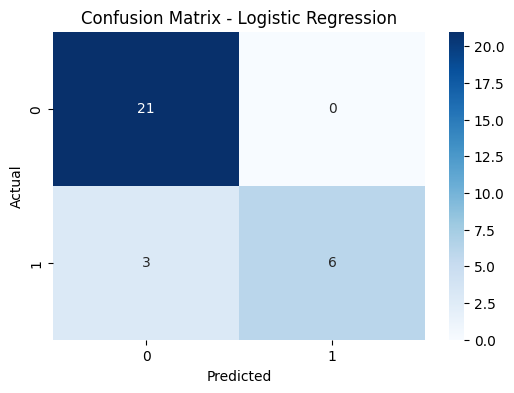

In [41]:
# Visualize Logistic Regression Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_logistic.png')

**Random Forest**

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
#Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [47]:
# Print evaluation results
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Model Performance:
Accuracy: 0.80
Precision: 0.80
Recall: 0.44
Confusion Matrix:
[[20  1]
 [ 5  4]]


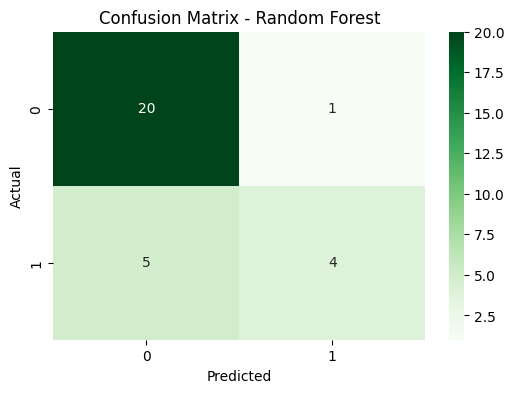

In [48]:
# Visualize Random Forest Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix_random_forest.png')
